#### MS5041 Optimasi Operasi
- Week 11 Part 05 Live Demo
- Example 02: Line Search Method
- Where to move: steepest descent
- How far to move: armijo + backtracking

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.family'] = 'Palatino Linotype'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [2]:
# Define the function of two variables
def func(x):
    return x[0]**2 + 2*x[1]**2  # A simple convex quadratic function

In [3]:
# Numerical gradient using central difference
def numerical_gradient(f, x, h=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_forward = np.copy(x)
        x_backward = np.copy(x)
        x_forward[i] += h
        x_backward[i] -= h
        grad[i] = (f(x_forward) - f(x_backward)) / (2 * h)
    return grad

# Backtracking line search with Armijo condition
def backtracking_line_search(f, x, p, grad, alpha=1.0, rho=0.5, mu1=1e-4):
    while f(x + alpha * p) > f(x) + mu1 * alpha * np.dot(grad, p):
        alpha = rho * alpha # here is the backtracking step
    return alpha

# Steepest descent optimization
def steepest_descent(f, x0, tol=1e-6, max_iter=100):
    x = x0
    path = [x0.copy()]
    for _ in range(max_iter):
        grad = numerical_gradient(f, x)
        if np.linalg.norm(grad) < tol:
            break
        p = -grad
        alpha = backtracking_line_search(f, x, p, grad)
        x = x + alpha * p
        path.append(x.copy())
    return x, path

In [8]:
# Run optimization
x0 = np.array([2.0, 2.0])
xmin, path = steepest_descent(func, x0)
path = np.array(path)

print(f"Total iterations: {len(path) - 1}")

Total iterations: 2


In [5]:
# Create contour plot
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = func([X, Y])

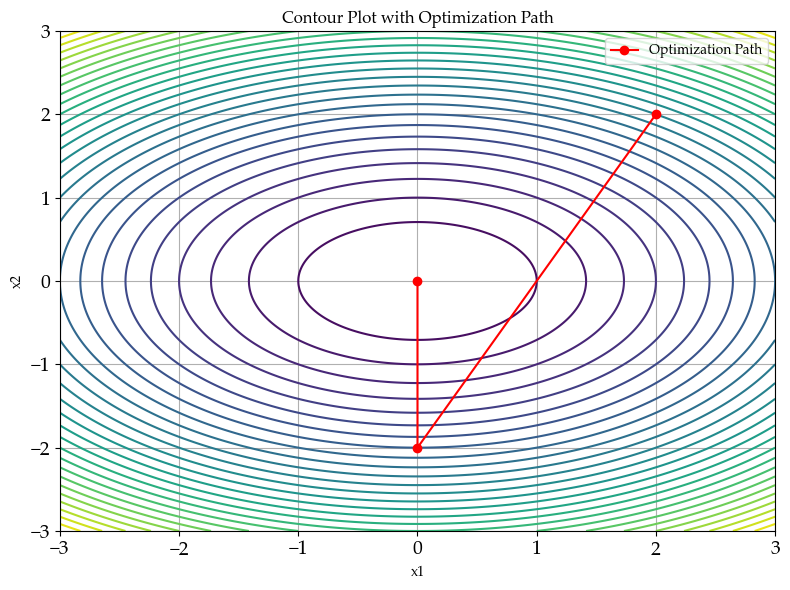

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
CS = ax.contour(X, Y, Z, levels=30)
ax.plot(path[:, 0], path[:, 1], marker='o', color='red', label='Optimization Path')
ax.set_title("Contour Plot with Optimization Path")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


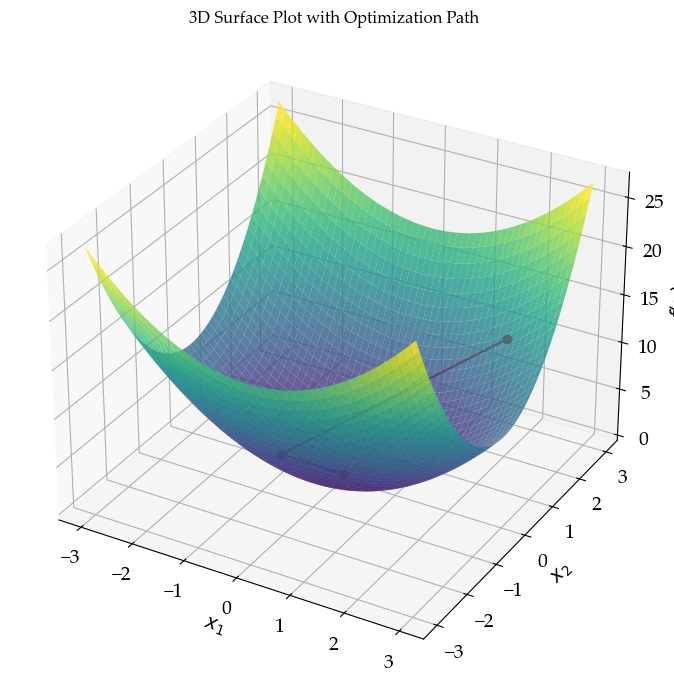

In [7]:
# Create 3D surface plot
# %matplotlib qt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.plot(path[:, 0], path[:, 1], func(path.T), color='red', marker='o', label='Optimization Path')
ax.set_title("3D Surface Plot with Optimization Path")
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$f(x)$', fontsize=14)
plt.tight_layout()
plt.show()